## The Android App Market Analysis
 A comprehensive analysis of the Android app market in order to devise strategies to drive growth and retention.
 
Based on datasets from the the Google Play website. 

apps.csv contains all the details of the applications on Google Play. There are 13 features that describe a given app.

In [94]:
import pandas as pd
import numpy as np
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

apps = pd.read_csv("datasets/apps.csv", index_col=0)

apps.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite â€“ FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159  19.0      10,000+  Free     0       Everyone   
1      967  14.0     500,000+  Free     0       Everyone   
2    87510   8.7   5,000,000+  Free     0       Everyone   
3   215644  25.0  50,000,000+  Free     0           Teen   
4      967   2.8     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [95]:
# A random sample of 5 rows
print(apps.sample(5))

                                App         Category  Rating  Reviews  Size  \
6372          BK Formula Calculator            TOOLS     5.0        6  11.0   
7223  Terminal Emulator for Android            TOOLS     4.4   113951   0.6   
8091                       CY Konum  PERSONALIZATION     NaN        1   1.3   
5957                     iHunter BC           SPORTS     4.4       55  63.0   
5073     PhotoScan by Google Photos      PHOTOGRAPHY     4.3    61990   NaN   

         Installs  Type  Price Content Rating           Genres  \
6372         100+  Free      0       Everyone            Tools   
7223  10,000,000+  Free      0       Everyone            Tools   
8091         100+  Free      0       Everyone  Personalization   
5957       1,000+  Paid  $4.49       Everyone           Sports   
5073  10,000,000+  Free      0       Everyone      Photography   

          Last Updated      Current Ver   Android Ver  
6372    August 8, 2015            0.1.1    4.2 and up  
7223    April 15

# Clearing data

Let's turn columns "Installs" and "Price" into purely numeric:

In [96]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
    apps[col] = apps[col].astype('float')

print(apps.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


# Exploring app categories

In [97]:
num_categories = apps['Category'].nunique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()


data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

print('Number of apps in each category:')
plotly.offline.iplot(data)

Number of categories =  33
Number of apps in each category:


# Distribution of app ratings

In [98]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }],
          'title': "Distribution of app ratings",
          'xaxis': {'title': "Rating"},
          'yaxis': {'title': "Number of apps"}
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


# Effect of size of an app

Let's look at the effect of size of an app on it's rating (among bigger categories). 

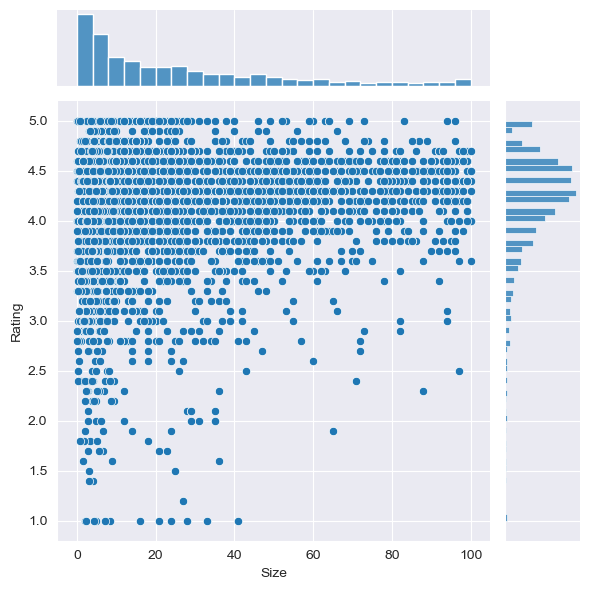

In [99]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(apps['Rating'].isnull() == False) &  (apps['Size'].isnull() == False)]

# Subset for categories with at least 350 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

In [100]:
print("Correlation: ", large_categories['Size'].corr(large_categories['Rating']))

Correlation:  0.0784463666650338


As we can see, there is no significant effect of size on rating.

# Relation between app category and app price

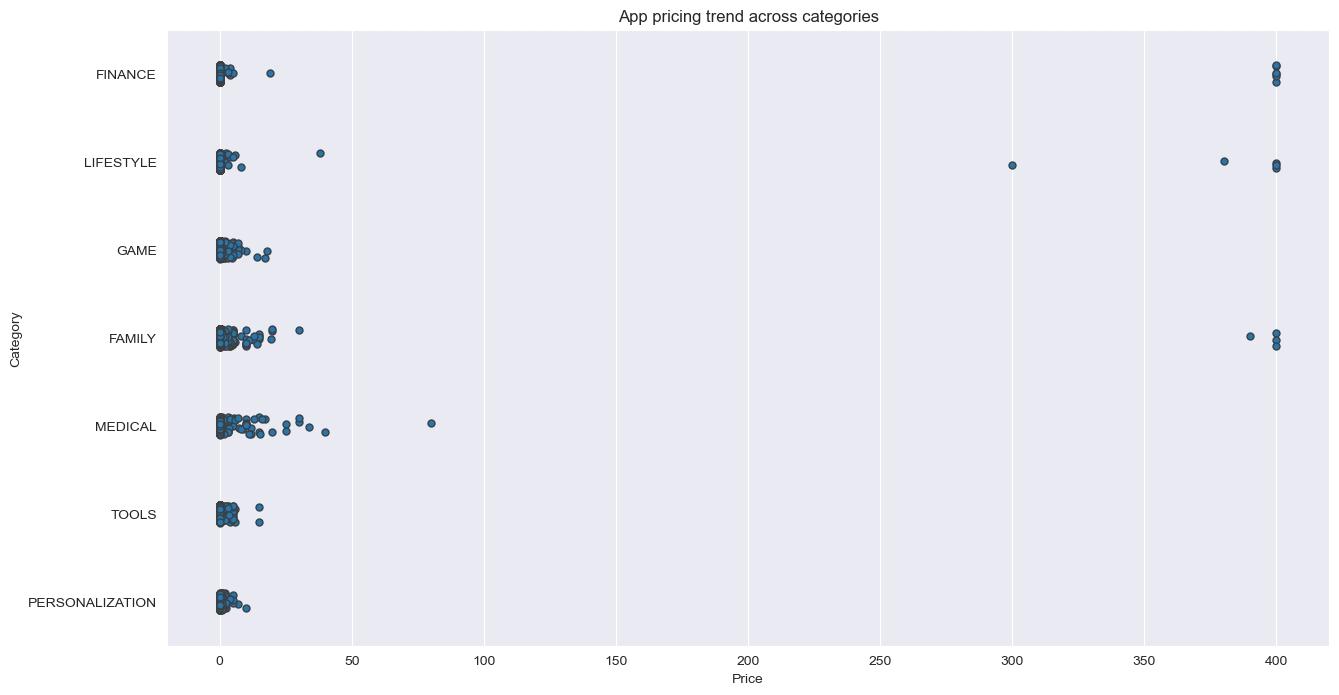

In [101]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = large_categories['Price'], y = large_categories['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
plt.show()

There are just a few apps priced above $25. Let's look at them:

In [102]:
apps_above_25 = large_categories[large_categories['Price'] > 25]
apps_above_25[['Category', 'App', 'Price']]

Category                             App   Price
2253    MEDICAL       Vargo Anesthesia Mega App   79.99
2266    MEDICAL                        EMT PASS   29.99
2298    MEDICAL              PTA Content Master   29.99
2301    MEDICAL         A Manual of Acupuncture   33.99
2414    MEDICAL                    LTC AS Legal   39.99
4197     FAMILY          most expensive app (H)  399.99
4362  LIFESTYLE                      ðŸ’Ž I'm rich  399.99
4367  LIFESTYLE        I'm Rich - Trump Edition  400.00
5351  LIFESTYLE                       I am rich  399.99
5354     FAMILY                  I am Rich Plus  399.99
5355  LIFESTYLE                   I am rich VIP  299.99
5356    FINANCE               I Am Rich Premium  399.99
5357  LIFESTYLE             I am extremely Rich  379.99
5358    FINANCE                      I am Rich!  399.99
5359    FINANCE              I am rich(premium)  399.99
5360  LIFESTYLE                I am Rich Person   37.99
5362     FAMILY                   I Am Rich Pro  399.99
5364    FINANCE  I am rich (Most expensive app)  399.99
5366     FAMILY                       I Am Rich  389.99
5369    FINANCE                       I am Rich  399.99
5373    FINANCE              I AM RICH PRO PLUS  399.99
5489     FAMILY       AP Art History Flashcards   29.99

Based on the names of the expensive apps, most of them are junk. Let's look at the apps in the normal price range:

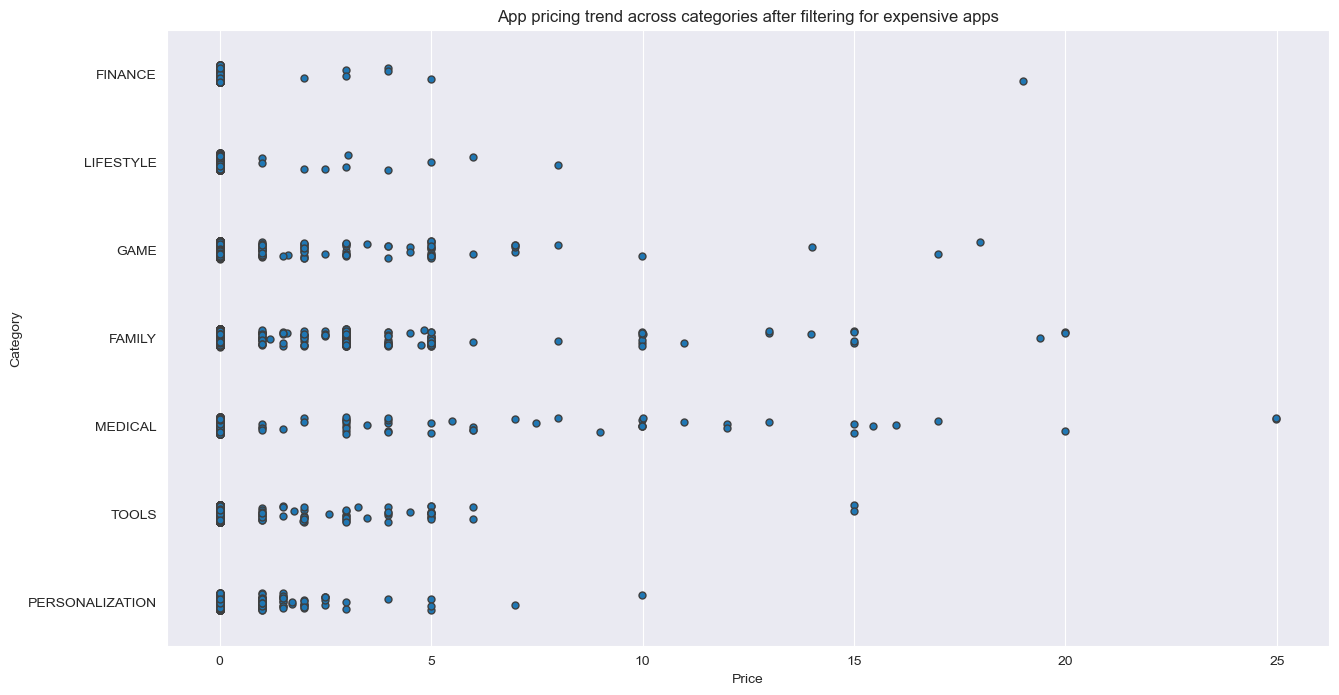

In [103]:
apps_under_25 = large_categories[large_categories["Price"] < 25]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_25, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for expensive apps')
plt.show()

Family and Medical app categories have more apps above $6.

# Effect of price of an app

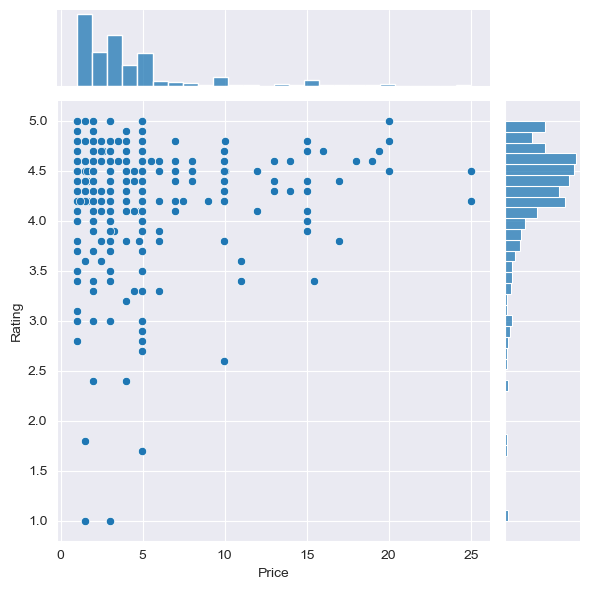

In [104]:
# Select apps whose 'Type' is 'Paid'
paid_apps = apps_under_25[apps_under_25["Type"] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

In [105]:
print("Correlation: ", paid_apps['Price'].corr(paid_apps['Rating']))

Correlation:  0.011925921116381489


As we can see, there is no significant effect of price on rating.

# Popularity of paid apps vs free apps

Now, lets examine if free apps are being downloaded much more often than paid apps:

In [106]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Free apps are way more popular. Median and 3rd quartile are 100 times greater.

# Sentiment analysis of user reviews

We have the following dataset of user reviews:

In [107]:
reviews_df = pd.read_csv("datasets/user_reviews.csv")
reviews_df.head(8)

App                                             Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   
6  10 Best Foods for You                                            Amazing   
7  10 Best Foods for You                                                NaN   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000  
6  Positive                0.60                0.900000  
7       NaN                 NaN                     NaN

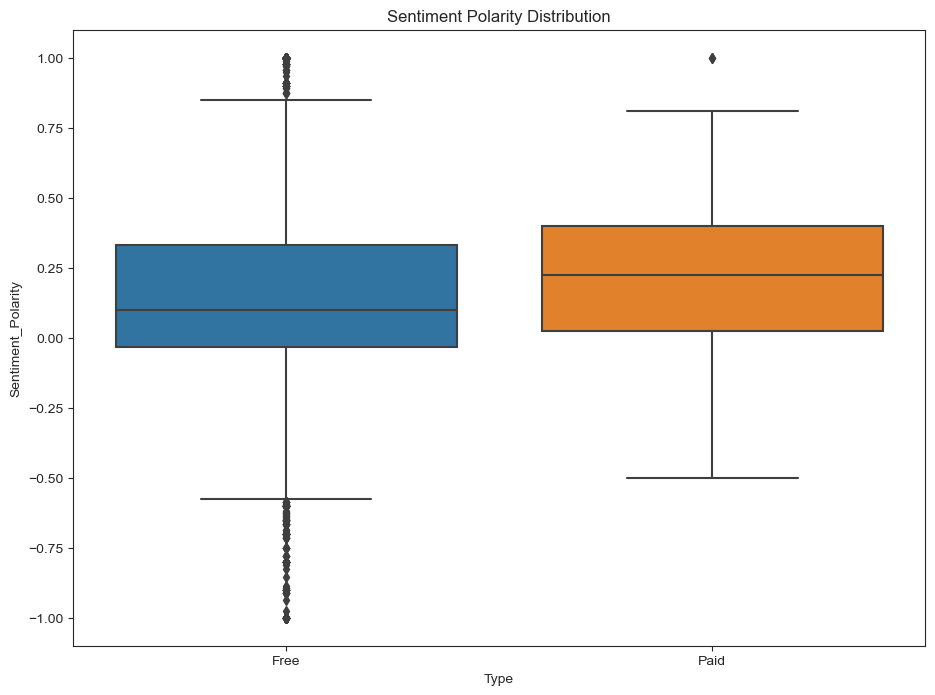

In [108]:
# Join the two dataframes
merged_df = apps_under_25.merge(reviews_df)

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = "Type", y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
plt.show()

Paid apps have better reviews on average and, apparently, never have extremely negative reviews.